 - 'rto - daily-interchange-data'
 - 'rto - daily-region-sub-ba-data'

In [1]:
import eia
import pandas as pd
import matplotlib.pyplot as plt

## Daily interchange data (10/17/22 - 11/16/22)

In [2]:
df = pd.read_csv('./data/data/rto/csv/daily-interchange-data_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,period,fromba,fromba-name,toba,toba-name,timezone,value,value-units
0,0.0,2022-11-16,BPAT,Bonneville Power Administration,CISO,California Independent System Operator,Arizona,9729,megawatthours
1,1.0,2022-11-16,CISO,California Independent System Operator,WALC,Western Area Power Administration - Desert Sou...,Mountain,-2226,megawatthours
2,2.0,2022-11-16,NY,New York,NE,New England,Eastern,-6362,megawatthours
3,3.0,2022-11-16,PNM,Public Service Company of New Mexico,EPE,El Paso Electric Company,Arizona,7607,megawatthours
4,4.0,2022-11-16,SWPP,Southwest Power Pool,SPA,Southwestern Power Administration,Eastern,-769,megawatthours
5,5.0,2022-11-16,BPAT,Bonneville Power Administration,BCHA,British Columbia Hydro and Power Authority,Eastern,-4707,megawatthours
6,6.0,2022-11-16,PACW,PacifiCorp West,AVA,Avista Corporation,Mountain,-1183,megawatthours
7,7.0,2022-11-16,CAL,California,NW,Northwest,Eastern,-18515,megawatthours
8,8.0,2022-11-16,PACW,PacifiCorp West,PGE,Portland General Electric Company,Pacific,-2934,megawatthours
9,9.0,2022-11-16,WALC,Western Area Power Administration - Desert Sou...,GRIF,"Griffith Energy, LLC",Central,-10733,megawatthours


In [4]:
df_timezone = pd.DataFrame(df['timezone'].value_counts())
df_timezone = df_timezone.drop(['timezone'])
sum1 = [0] * 5
for idx, row in df.iterrows():
    if row['timezone'] == 'Eastern':
        sum1[0] += int(row['value'])
    elif row['timezone'] == 'Central':
        sum1[1] += int(row['value'])
    elif row['timezone'] == 'Mountain':
        sum1[2] += int(row['value'])
    elif row['timezone'] == 'Arizona':
        sum1[3] += int(row['value'])
    elif row['timezone'] == 'Pacific':
        sum1[4] += int(row['value'])
df_timezone['total value'] = sum1

In [5]:
df_timezone

,timezone,total value
Pacific,10424,-6143541
Mountain,10079,-5804234
Arizona,9990,-4704984
Central,9900,-5240251
Eastern,9607,-4202789


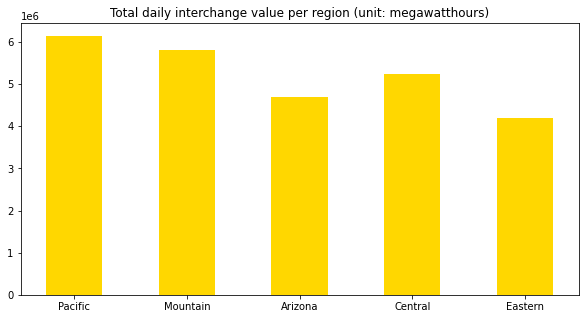

In [10]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(['Pacific', 'Mountain', 'Arizona', 'Central', 'Eastern'], -df_timezone['total value'], width=0.5, color='gold')
plt.title('Total daily interchange value per region (unit: megawatthours)')
plt.show()

In [20]:
fromba = dict(df['fromba'].value_counts())
for key in fromba:
    fromba[key] = 0
for idx, row in df.iterrows():
    try:
        fromba[row['fromba']] += int(row['value'])
    except ValueError:
        continue
fromba = dict(sorted(fromba.items(), key=lambda item: item[1], reverse=True))
del fromba['fromba']

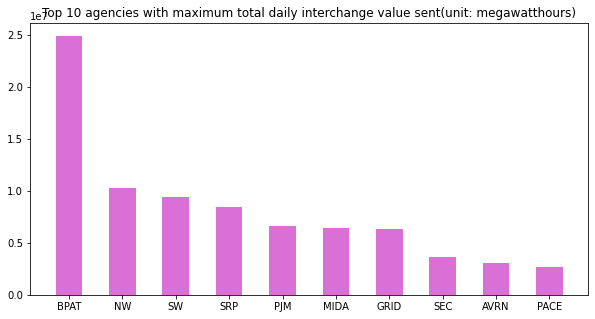

In [21]:
top10 = []
top10_value = []
for key in fromba:
    if len(top10) < 10:
        top10.append(key)
        top10_value.append(fromba[key])
plt.bar(top10, top10_value, width=0.5, color='orchid')
plt.title('Top 10 agencies with maximum total daily interchange value sent(unit: megawatthours)')
plt.show()

In [22]:
toba = dict(df['toba'].value_counts())
for key in toba:
    toba[key] = 0
for idx, row in df.iterrows():
    try:
        toba[row['toba']] += int(row['value'])
    except ValueError:
        continue
toba = dict(sorted(toba.items(), key=lambda item: item[1], reverse=True))
del toba['toba']

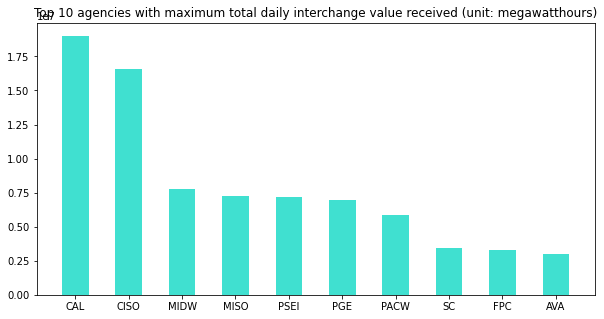

In [24]:
top10 = []
top10_value = []
for key in toba:
    if len(top10) < 10:
        top10.append(key)
        top10_value.append(toba[key])
plt.bar(top10, top10_value, width=0.5, color='turquoise')
plt.title('Top 10 agencies with maximum total daily interchange value received (unit: megawatthours)')
plt.show()

## Daily region sub ba data (07/17/22 - 11/17/22)

In [25]:
df = pd.read_csv('./data/data/rto/csv/daily-region-sub-ba-data_data.csv')

In [26]:
df.head(10)

,Unnamed: 0,period,subba,subba-name,parent,parent-name,timezone,value,value-units
0,0.0,2022-11-17,OKGE,Oklahoma Gas and Electric Co.,SWPP,Southwest Power Pool,Eastern,97310,megawatthours
1,1.0,2022-11-17,Frep,Freeport,PNM,Public Service Company of New Mexico,Arizona,1693,megawatthours
2,2.0,2022-11-17,GRDA,Grand River Dam Authority,SWPP,Southwest Power Pool,Eastern,19746,megawatthours
3,3.0,2022-11-17,TSGT,Tri-State Generation and Transmission,PNM,Public Service Company of New Mexico,Arizona,7463,megawatthours
4,4.0,2022-11-17,KAFB,Kirtland Air Force Base,PNM,Public Service Company of New Mexico,Eastern,1193,megawatthours
5,5.0,2022-11-17,OPPD,Omaha Public Power District,SWPP,Southwest Power Pool,Eastern,36311,megawatthours
6,6.0,2022-11-17,LES,Lincoln Electric System,SWPP,Southwest Power Pool,Central,10021,megawatthours
7,7.0,2022-11-17,INDN,Independence Power & Light,SWPP,Southwest Power Pool,Eastern,2839,megawatthours
8,8.0,2022-11-17,ZONJ,New York City,NYIS,New York Independent System Operator,Eastern,127120,megawatthours
9,9.0,2022-11-17,LAC,Los Alamos County,PNM,Public Service Company of New Mexico,Central,1861,megawatthours


In [27]:
df_timezone = pd.DataFrame(df['timezone'].value_counts())
df_timezone = df_timezone.drop(['timezone'])
sum1 = [0] * 5
for idx, row in df.iterrows():
    if row['timezone'] == 'Eastern':
        sum1[0] += int(row['value'])
    elif row['timezone'] == 'Central':
        sum1[1] += int(row['value'])
    elif row['timezone'] == 'Mountain':
        sum1[2] += int(row['value'])
    elif row['timezone'] == 'Arizona':
        sum1[3] += int(row['value'])
    elif row['timezone'] == 'Pacific':
        sum1[4] += int(row['value'])
df_timezone['total value'] = sum1

In [28]:
df_timezone

,timezone,total value
Eastern,10081,920165727
Central,10069,921358530
Mountain,9969,905687207
Arizona,9958,907894040
Pacific,9923,903641156


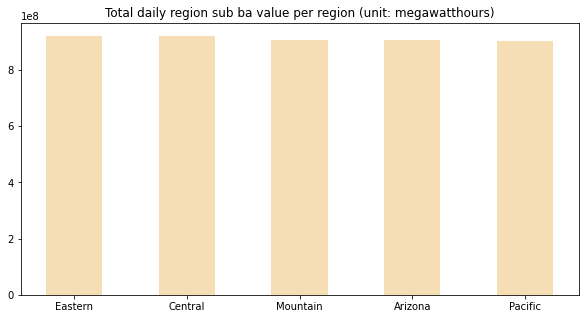

In [31]:
plt.bar(['Eastern', 'Central', 'Mountain', 'Arizona', 'Pacific'], df_timezone['total value'], width=0.5, color='wheat')
plt.title('Total daily region sub ba value per region (unit: megawatthours)')
plt.show()

In [32]:
subba = dict(df['subba'].value_counts())
for key in subba:
    subba[key] = 0
for idx, row in df.iterrows():
    try:
        subba[row['subba']] += int(row['value'])
    except ValueError:
        continue
subba = dict(sorted(subba.items(), key=lambda item: item[1], reverse=True))
del subba['subba']

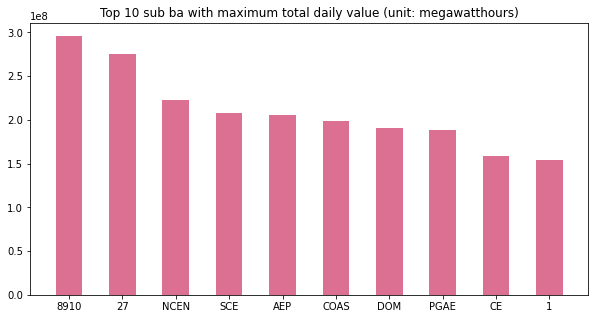

In [37]:
top10 = []
top10_value = []
for key in subba:
    if len(top10) < 10:
        top10.append(key)
        top10_value.append(subba[key])
plt.bar(top10, top10_value, width=0.5, color='palevioletred')
plt.title('Top 10 sub ba with maximum total daily value (unit: megawatthours)')
plt.show()

In [34]:
parent = dict(df['parent'].value_counts())
for key in parent:
    parent[key] = 0
for idx, row in df.iterrows():
    try:
        parent[row['parent']] += int(row['value'])
    except ValueError:
        continue
parent = dict(sorted(parent.items(), key=lambda item: item[1], reverse=True))
del parent['parent']

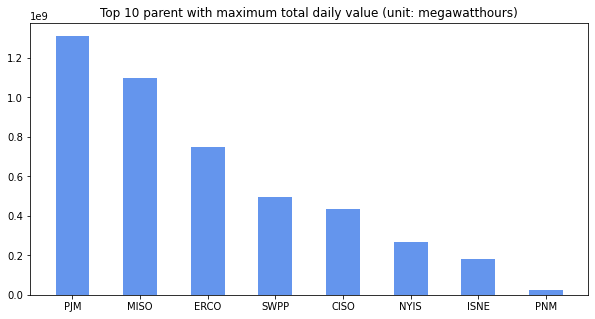

In [36]:
top10 = []
top10_value = []
for key in parent:
    if len(top10) < 10:
        top10.append(key)
        top10_value.append(parent[key])
plt.bar(top10, top10_value, width=0.5, color='cornflowerblue')
plt.title('Top 10 parent with maximum total daily value (unit: megawatthours)')
plt.show()